In [38]:
from openTSNE import TSNE

import numpy as np
from sklearn.model_selection import train_test_split

In [62]:
def plot(
    x,
    y,
    ax=None,
    title=None,
    draw_legend=True,
    draw_centers=False,
    draw_cluster_labels=False,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(map(colors.get, y))

    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    # Plot mediods
    if draw_centers:
        centers = []
        for yi in classes:
            mask = yi == y
            centers.append(np.median(x[mask, :2], axis=0))
        centers = np.array(centers)

        center_colors = list(map(colors.get, classes))
        ax.scatter(
            centers[:, 0], centers[:, 1], c=center_colors, s=48, alpha=1, edgecolor="k"
        )

        # Draw mediod labels
        if draw_cluster_labels:
            for idx, label in enumerate(classes):
                ax.text(
                    centers[idx, 0],
                    centers[idx, 1] + 2.2,
                    label,
                    fontsize=kwargs.get("fontsize", 6),
                    horizontalalignment="center",
                )

    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)


In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('../Data/clean_df_compsci.csv')
data = data.drop(columns=['Course'])
data.head()

,Age,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,22,1,3.19,1,1,3,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0,0,1,1.0,17,0.0
1,22,1,3.46,3,1,0,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0,0,4,1.0,29,0.5
2,27,1,3.56,1,3,2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0,4,0.5,17,0.0
3,18,0,3.60,2,0,5,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0,0,2,0.0,25,0.0
4,24,0,3.43,3,1,3,1.0,0.5,0.5,0.5,0.0,0.0,0.0,1,0,5,0.0,27,0.5


In [42]:
y = data['Depression_Score'].apply(lambda x: str(x)).to_numpy()
X = data.drop(columns=['Depression_Score']).to_numpy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [45]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

%time embedding_train = tsne.fit(X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=57.00 for 250 iterations...
Iteration   50, KL divergence 2.7689, 50 iterations in 14.9073 sec
Iteration  100, KL divergence 2.7352, 50 iterations in 13.9344 sec
Iteration  150, KL divergence 2.7343, 50 iterations in 14.5173 sec
Iteration  200, KL divergence 2.7343, 50 iterations in 14.1668 sec
Iteration  250, KL divergence 2.7343, 50 iterations in 14.0503 sec
   --> Time elapsed: 71.58 seconds
===> Running optimization with exaggeration=1.00, lr=

In [59]:
MACOSKO_COLORS = {
    "0": "#C38A1F",
    "1": "#A5C93D",
    "2": "#8B006B",
    "3": "#2000D7",
    "4": "#538CBA",
    "5": "#B33B19",
}

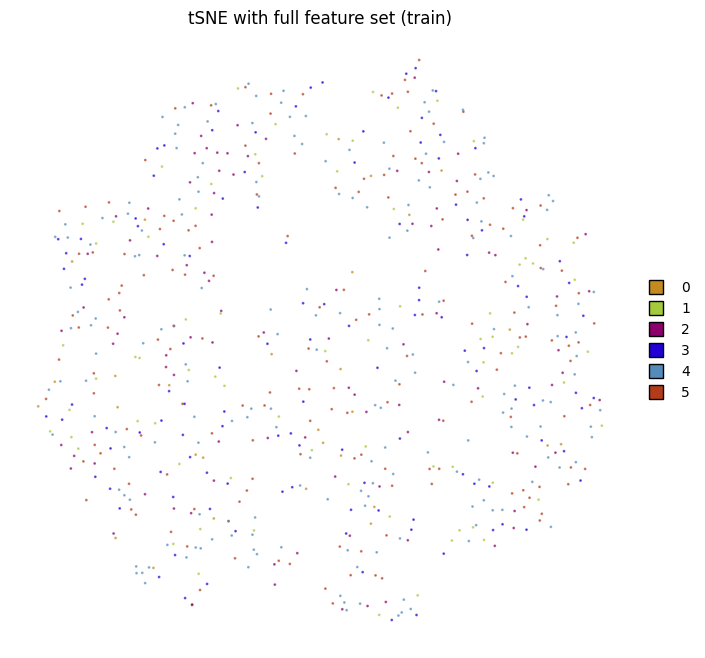

In [68]:
plot(embedding_train, y_train, colors=MACOSKO_COLORS, title="tSNE with full feature set (train)")

In [52]:
%time embedding_test = embedding_train.transform(X_test)

===> Finding 15 nearest neighbors in existing embedding using exact search...
   --> Time elapsed: 0.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 2725.2577, 50 iterations in 8.0453 sec
Iteration  100, KL divergence 2698.1516, 50 iterations in 7.6501 sec
Iteration  150, KL divergence 2696.5918, 50 iterations in 10.1994 sec
Iteration  200, KL divergence 2696.1931, 50 iterations in 12.5163 sec
Iteration  250, KL divergence 2696.1861, 50 iterations in 12.4696 sec
   --> Time elapsed: 50.88 seconds
CPU times: total: 10.8 s
Wall time: 51.3 s


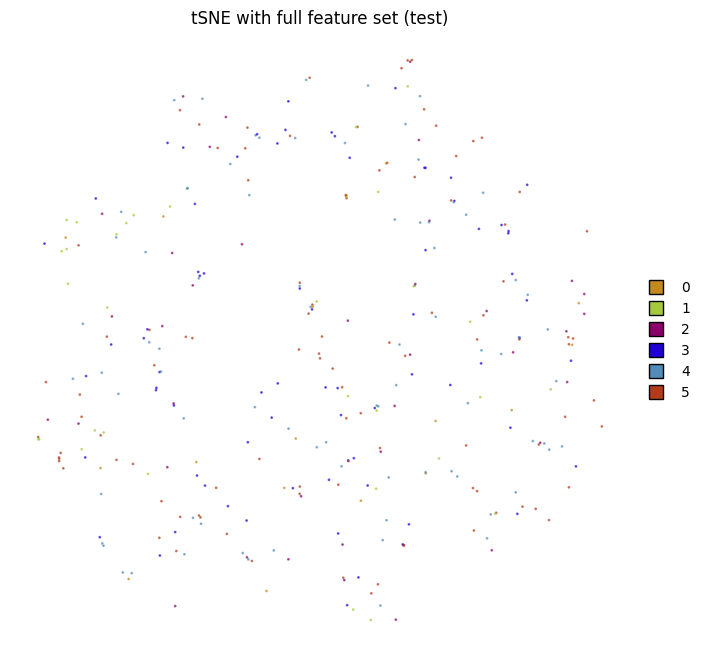

In [67]:
plot(embedding_test, y_test, colors=MACOSKO_COLORS, title="tSNE with full feature set (test)")

In [73]:
data.columns

Index(['Age', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
       'Social_Support', 'Relationship_Status', 'Substance_Use',
       'Counseling_Service_Use', 'Family_History', 'Chronic_Illness',
       'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type'],
      dtype='object')

C:\Users\123an\AppData\Local\Temp\ipykernel_24752\2084506113.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))


IndexError: index 18 is out of bounds for axis 1 with size 18

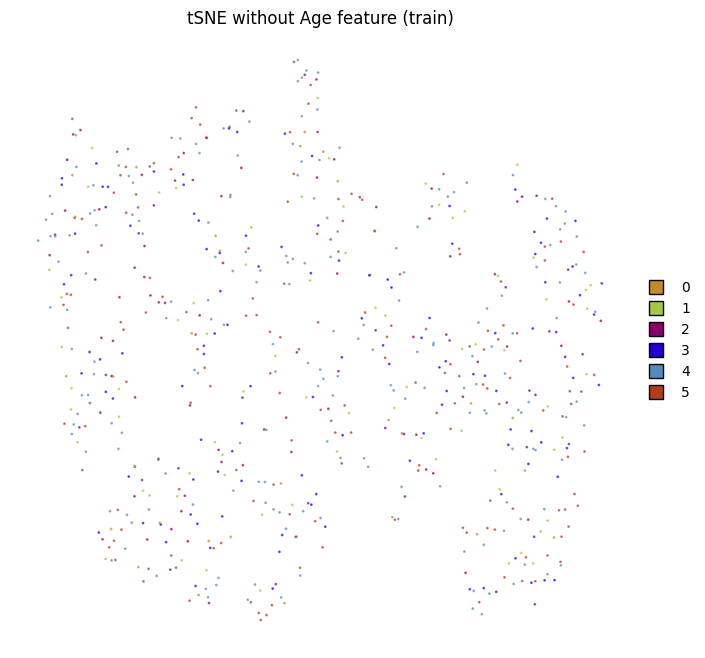

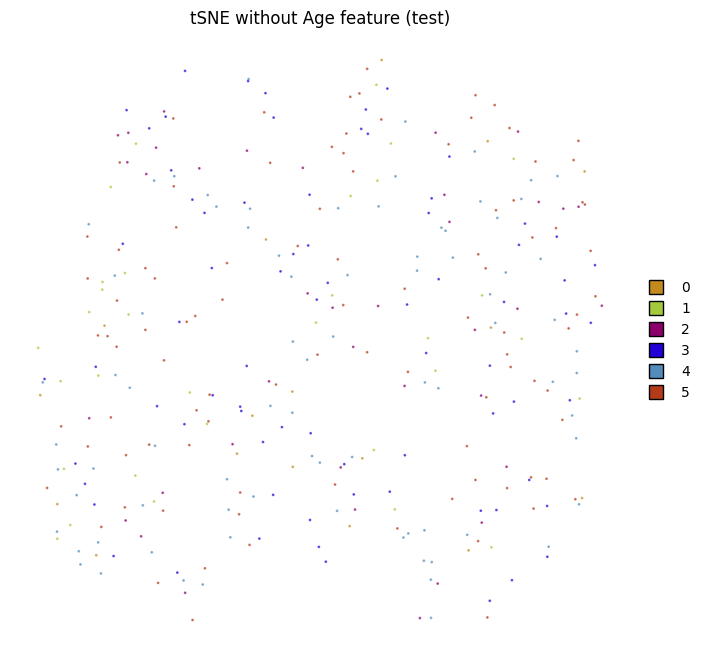

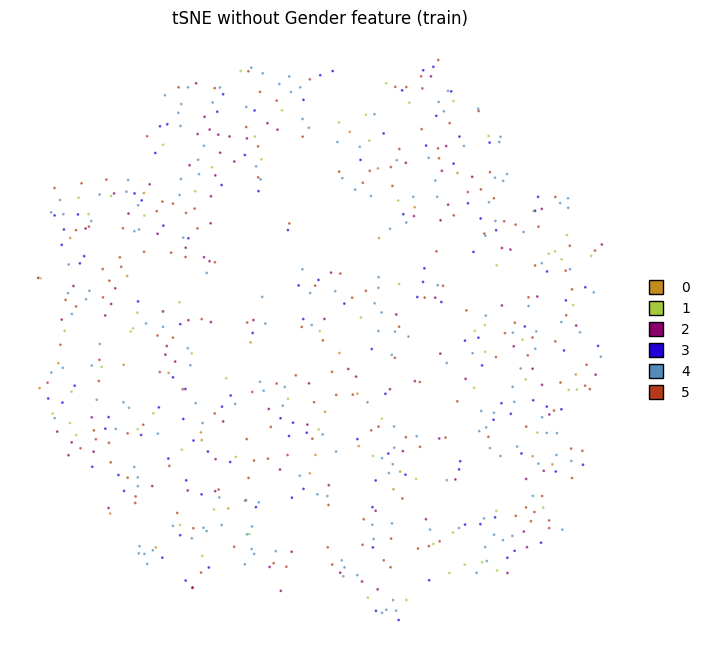

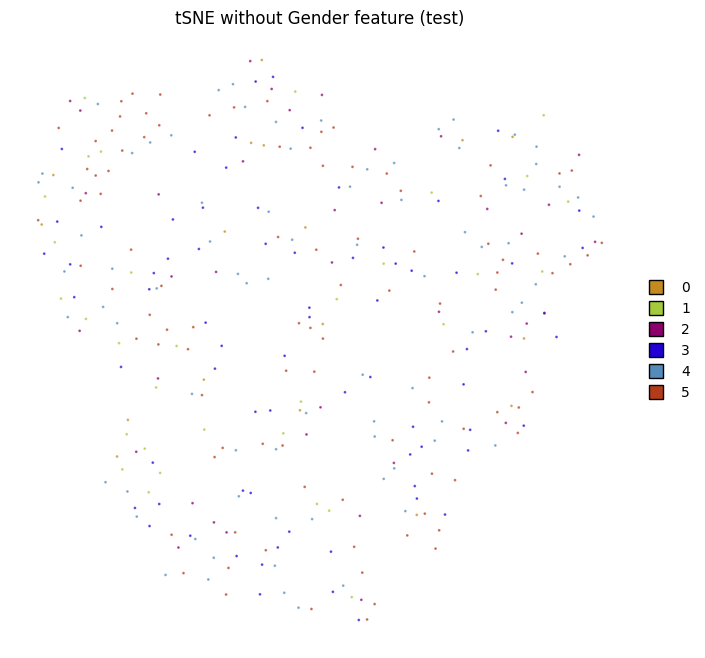

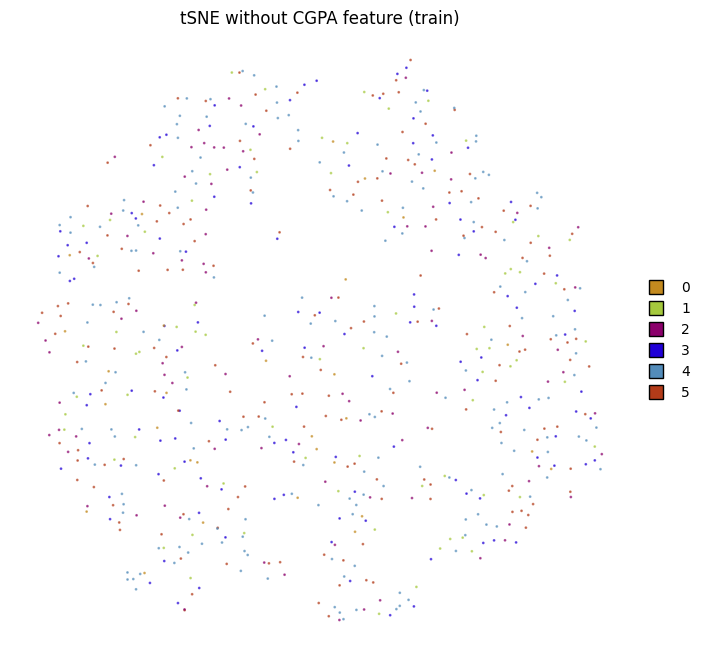

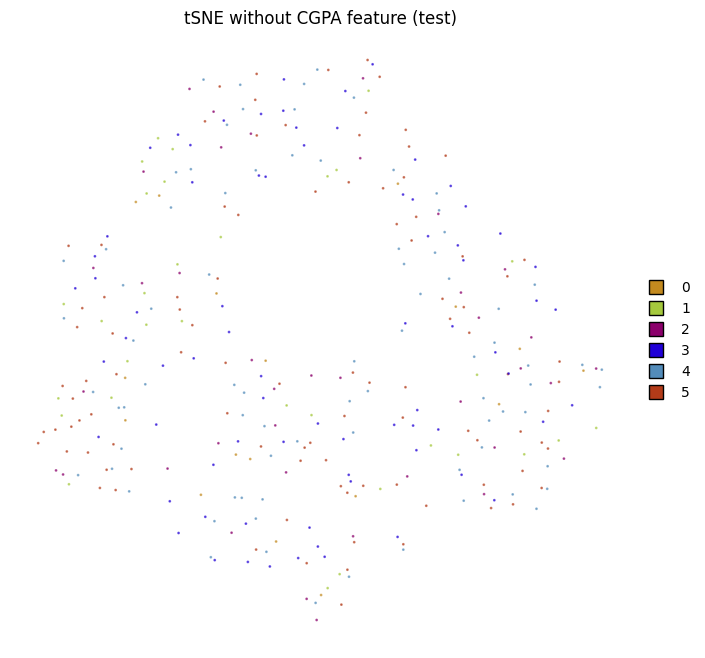

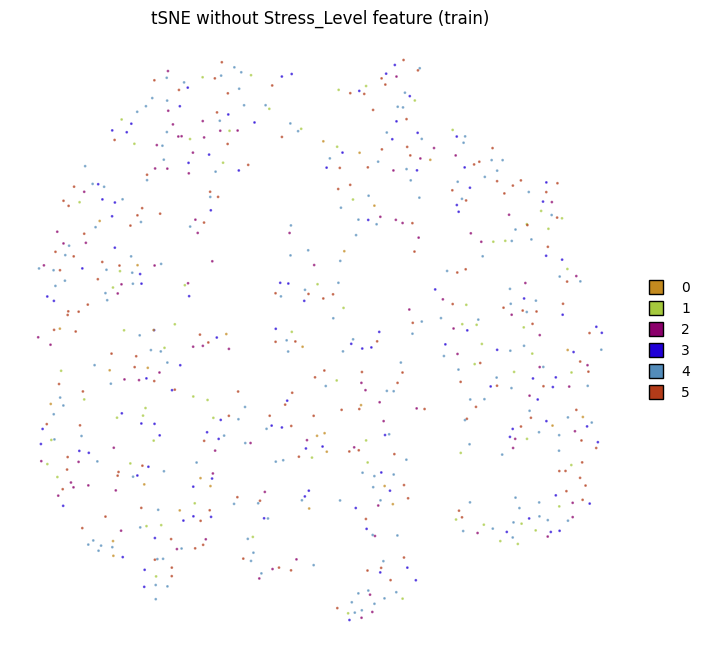

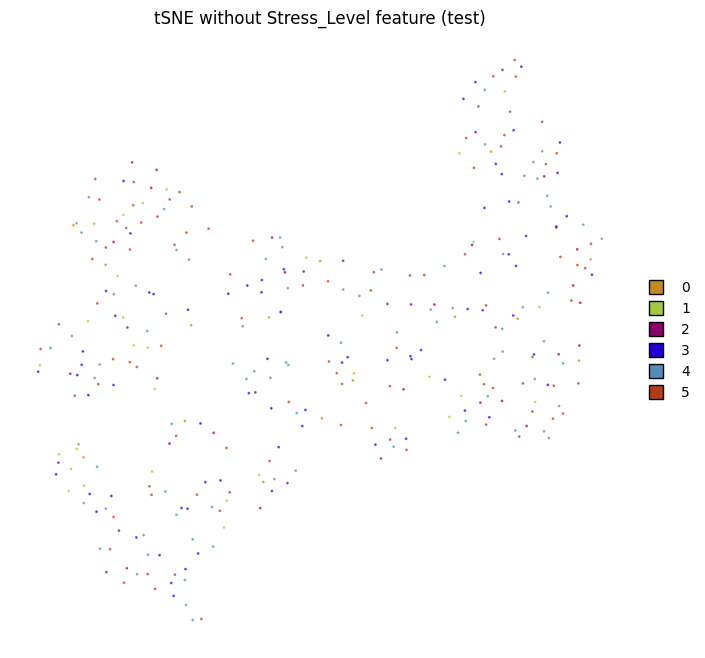

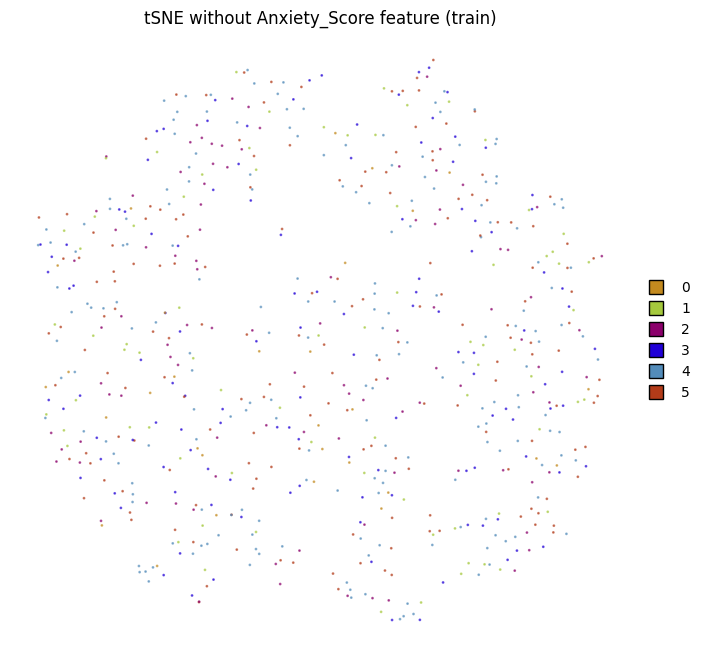

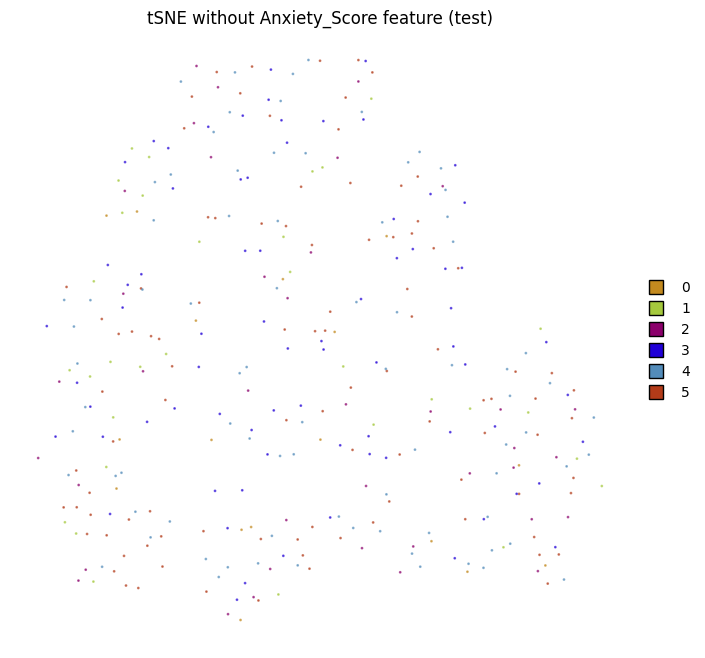

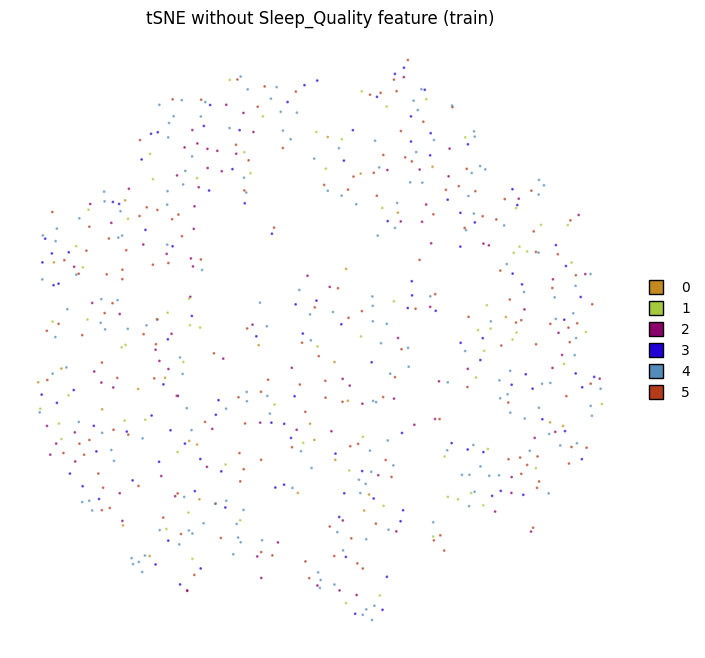

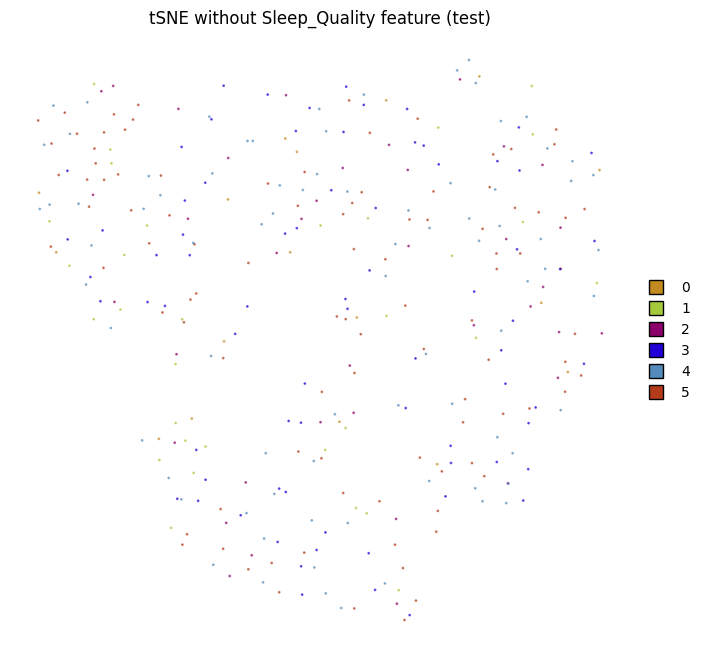

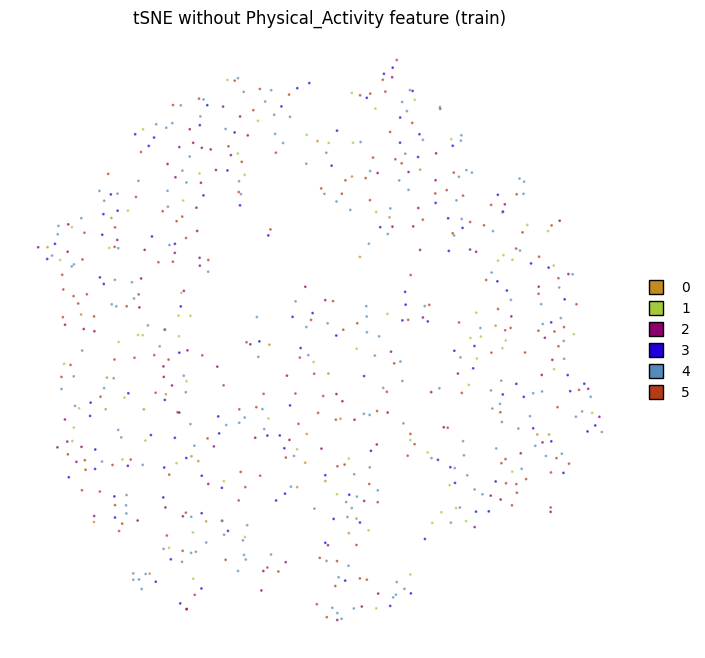

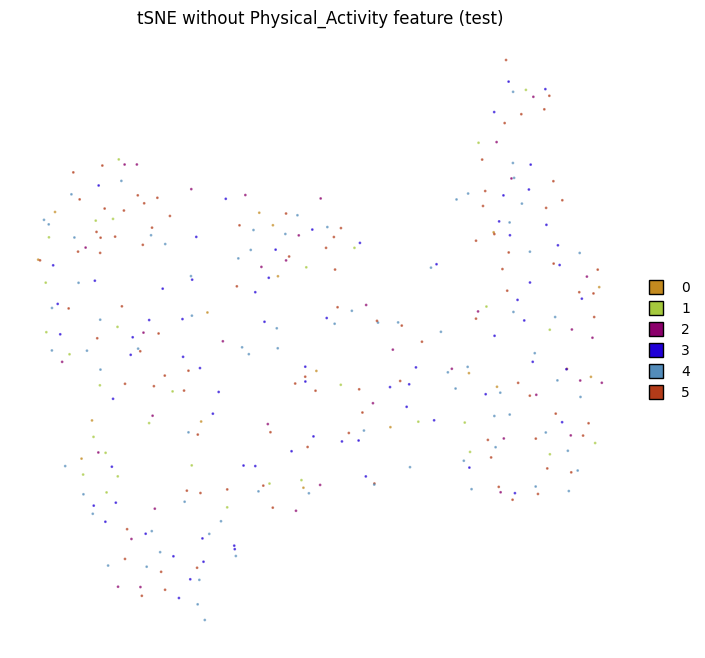

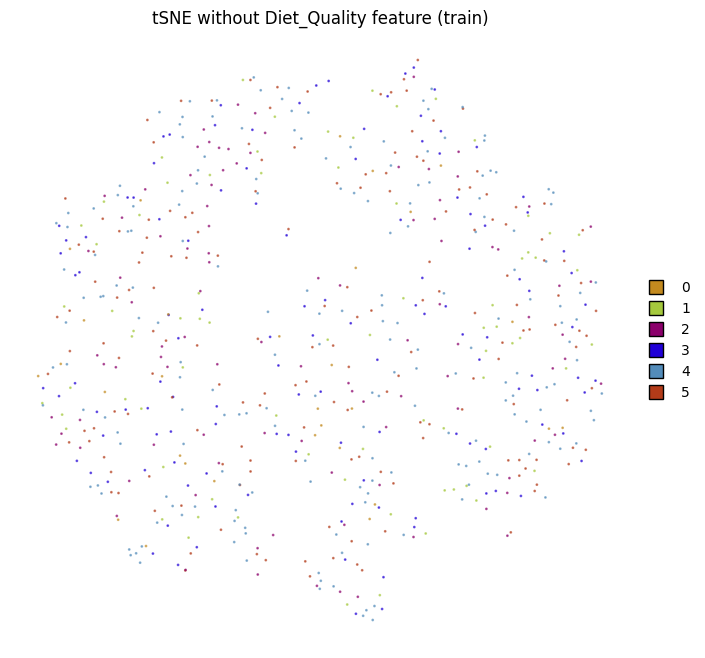

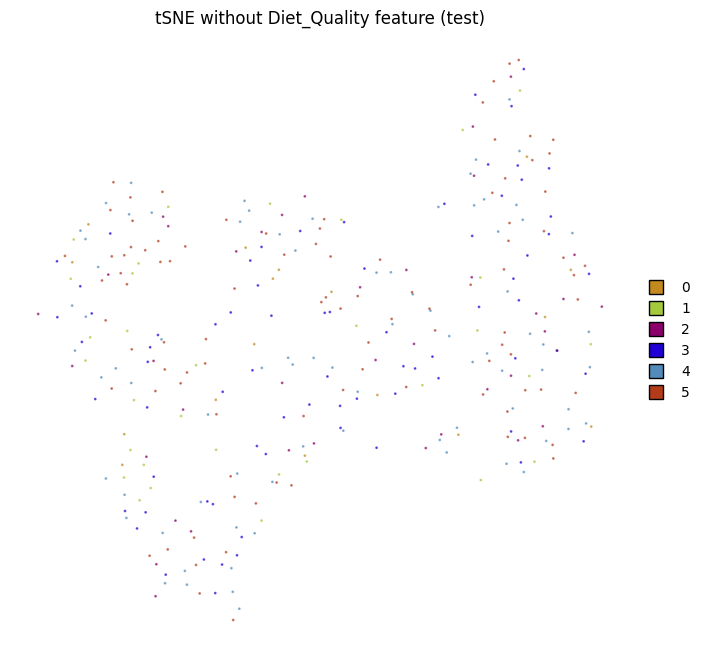

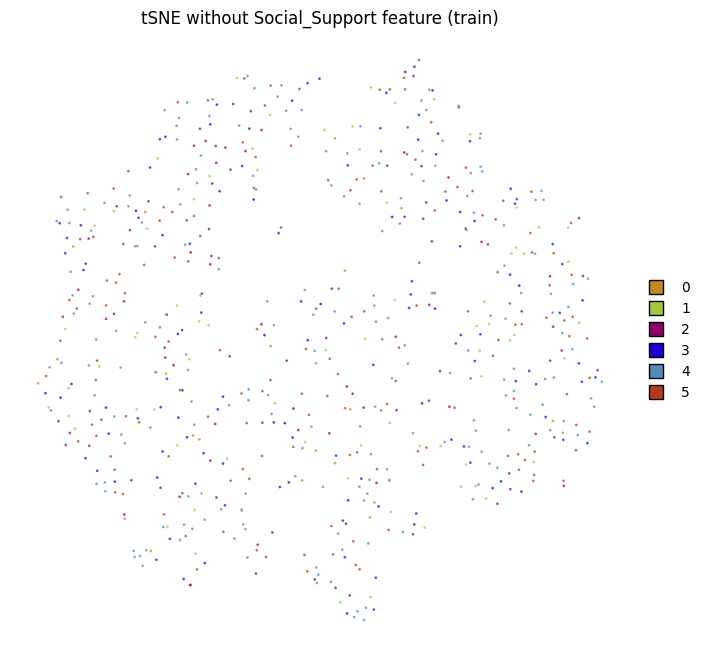

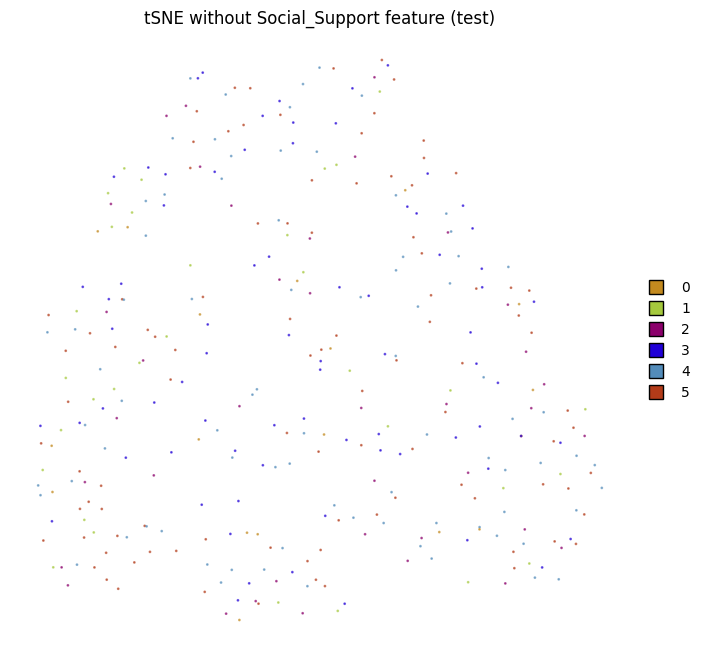

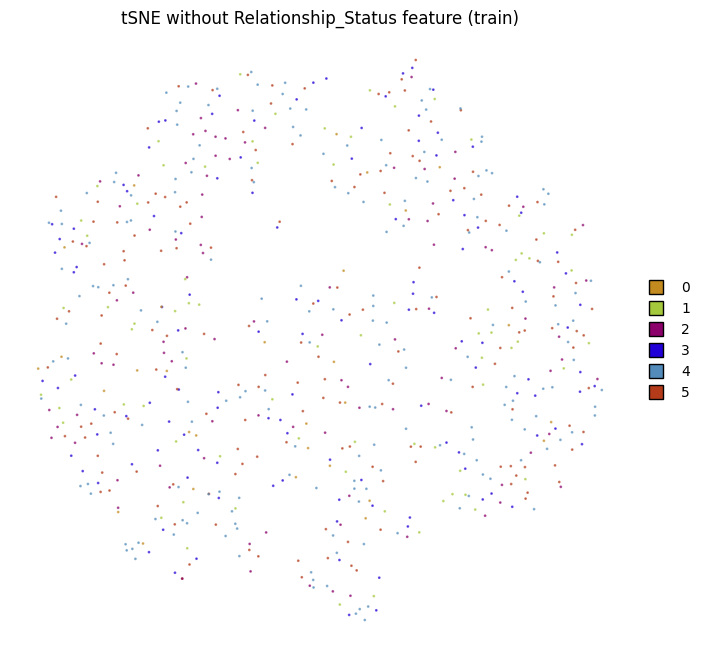

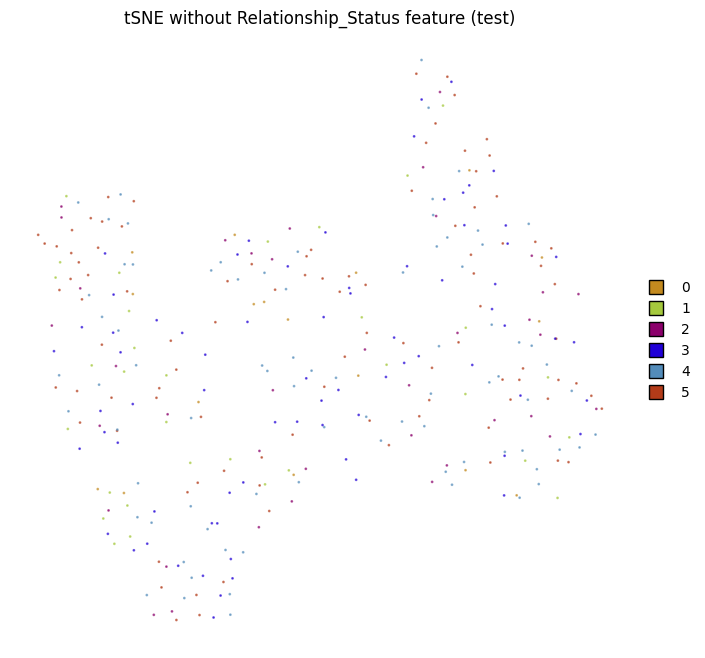

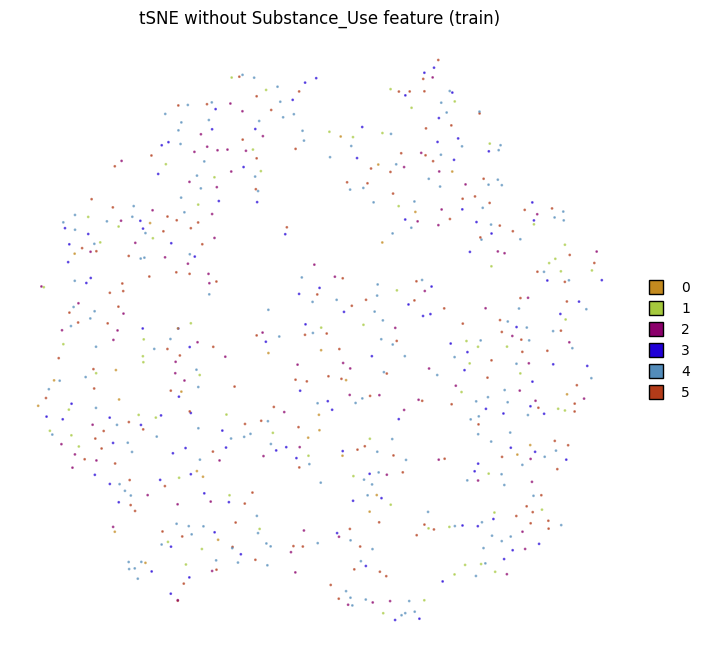

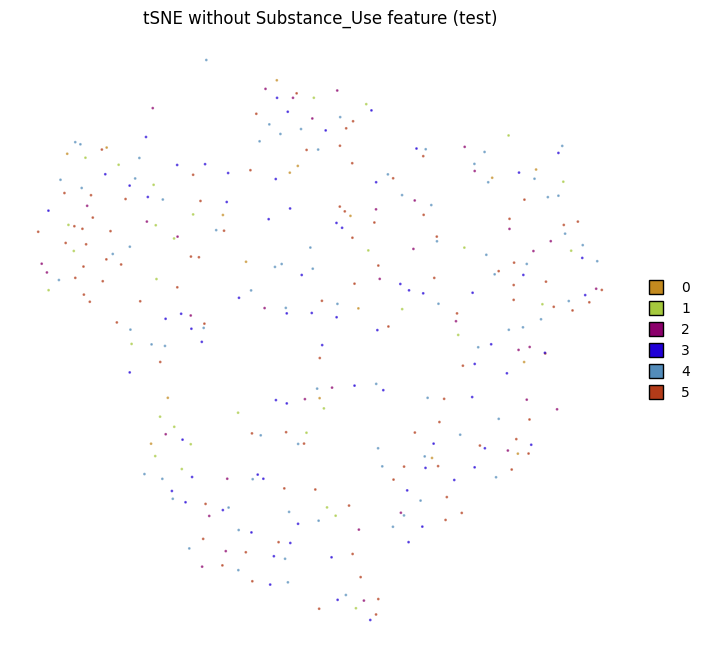

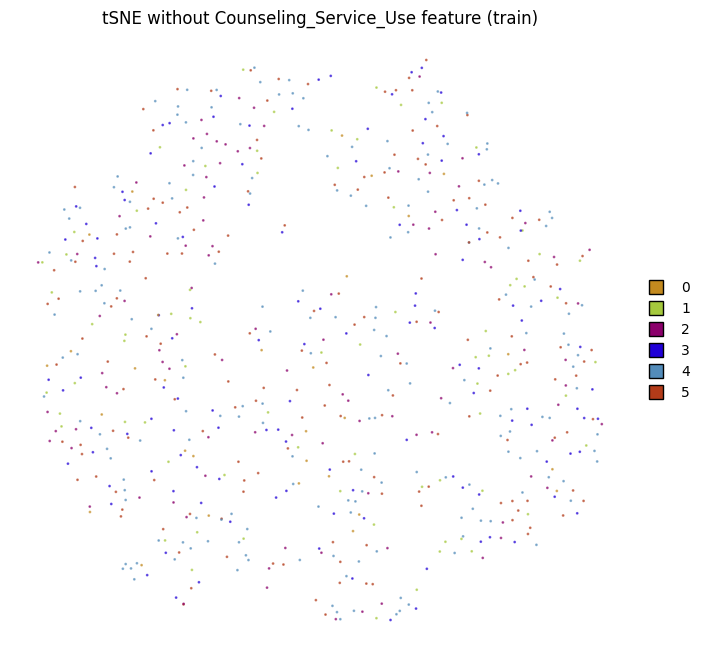

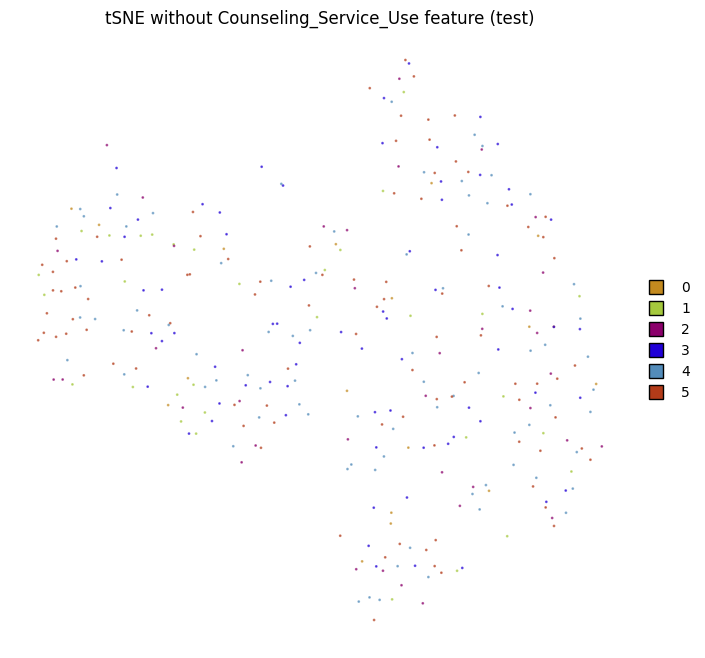

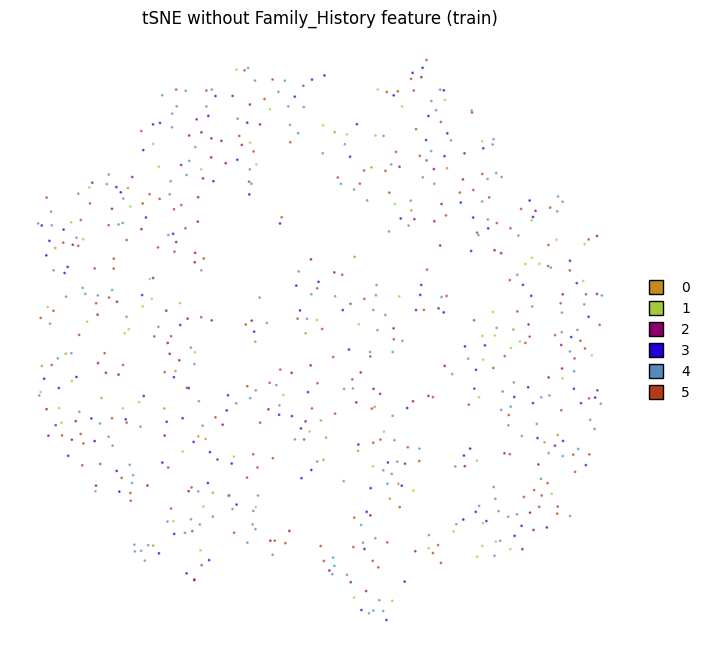

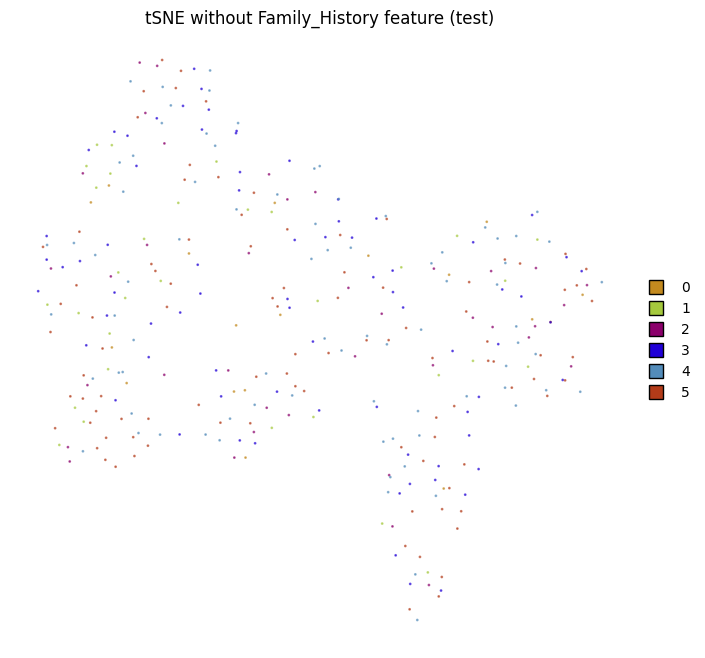

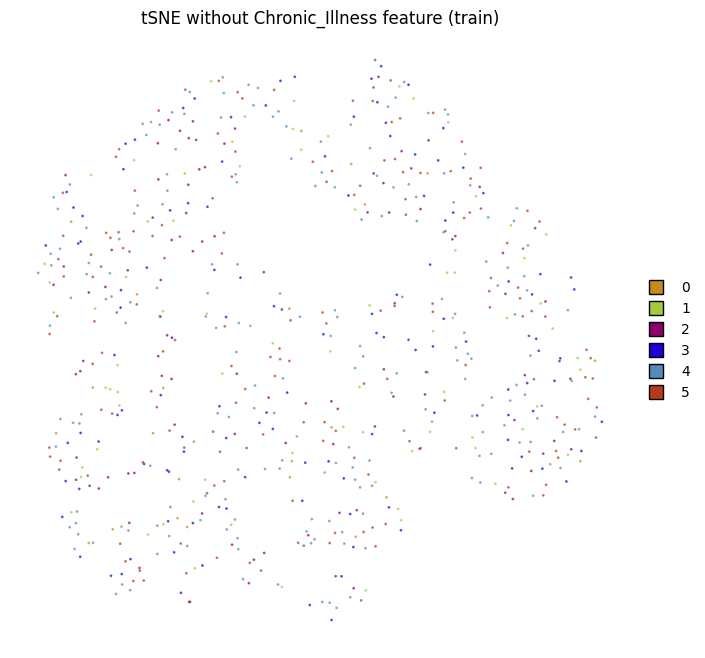

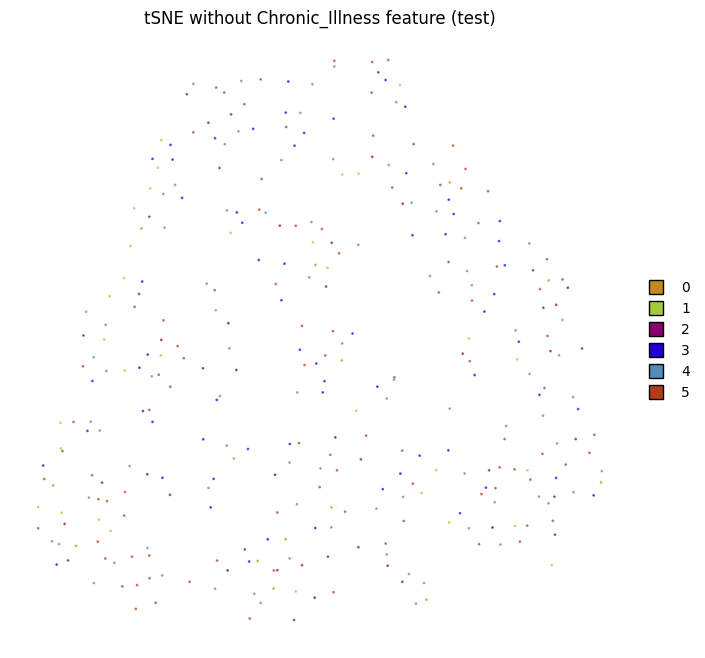

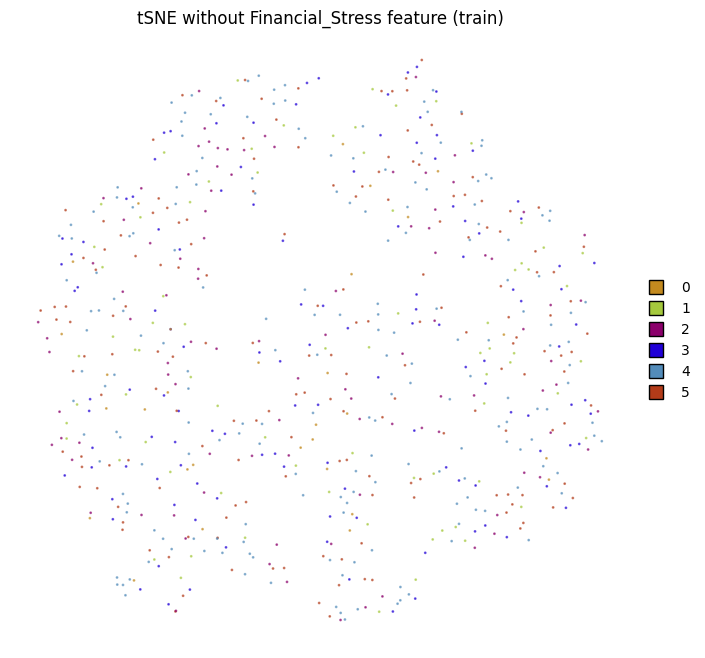

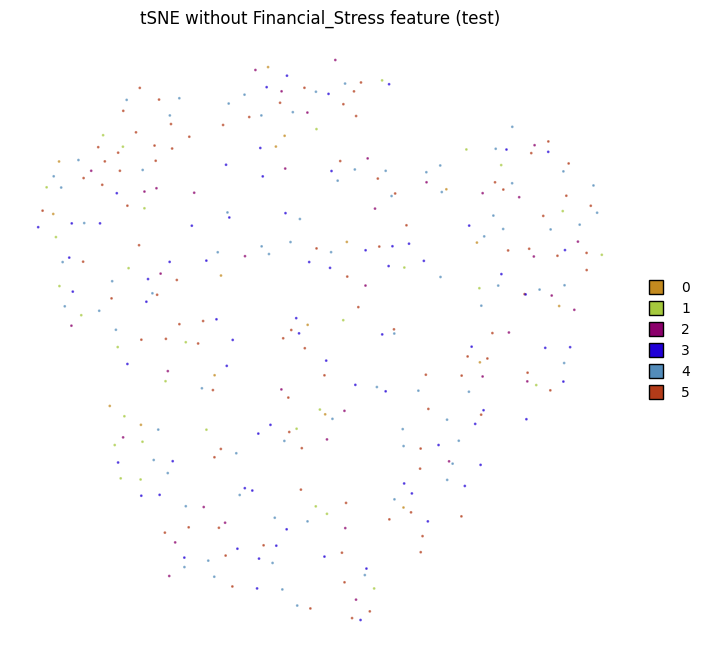

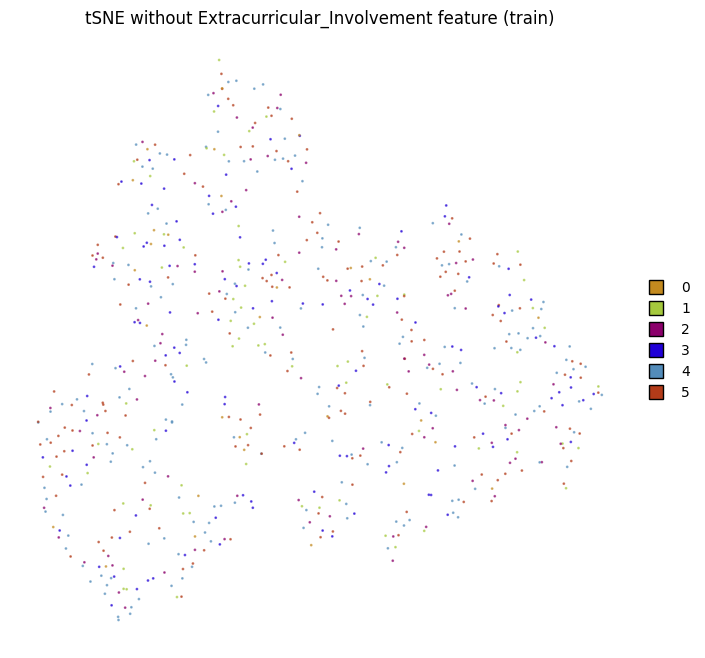

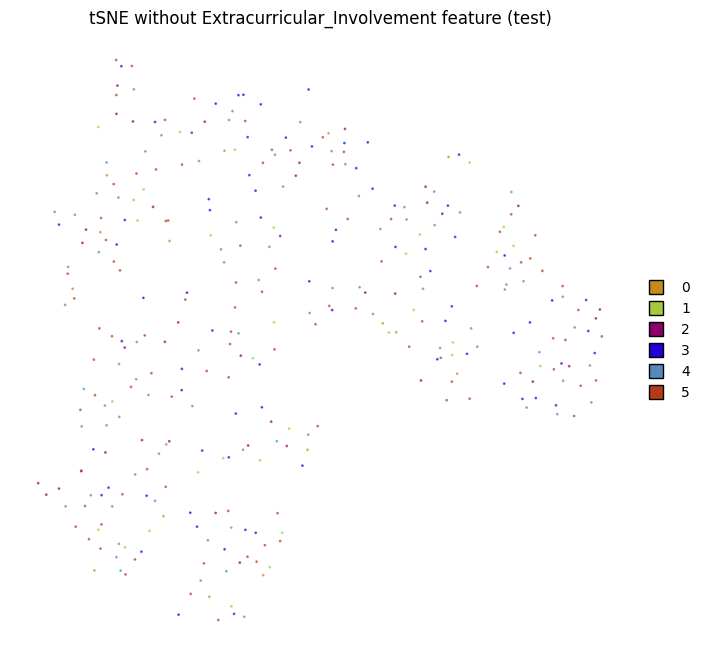

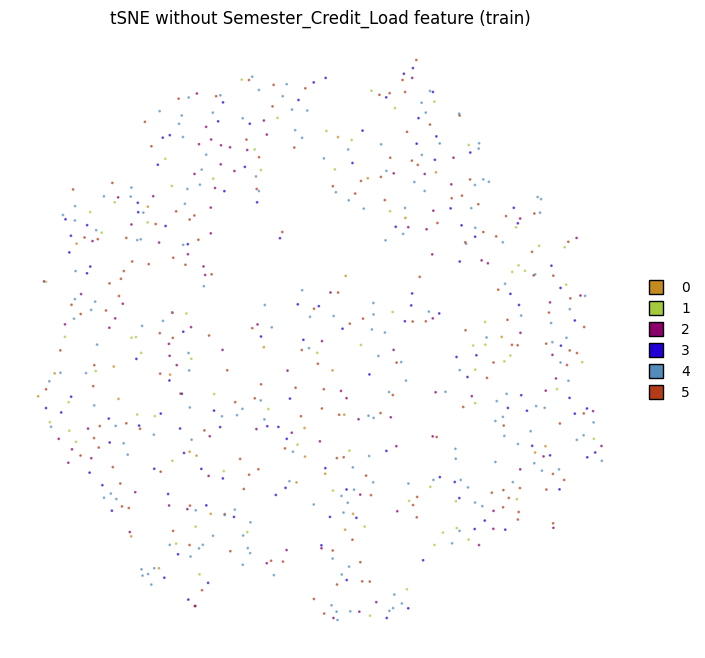

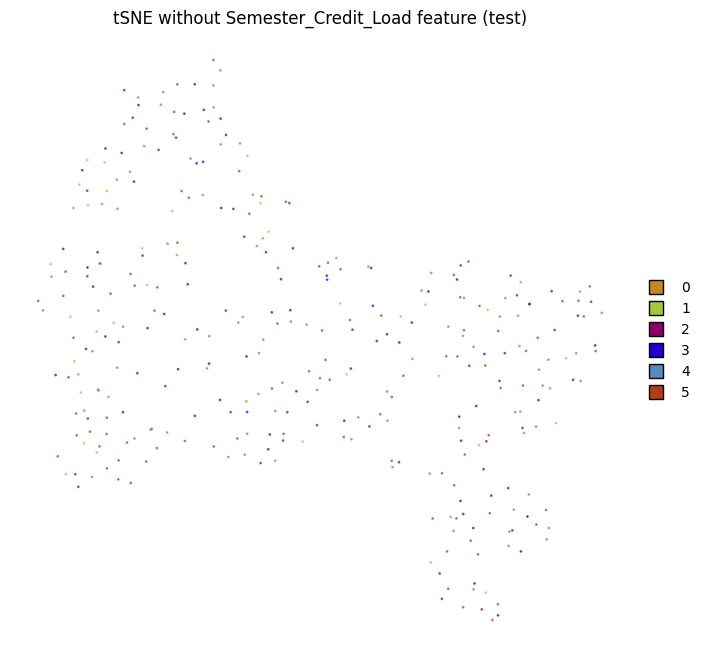

In [ ]:
idx = -1
for col in data.columns:
    if col == 'Depression_Score':
        continue

    idx+=1
    X_train_temp = np.delete(X_train, idx, axis=1)
    X_test_temp = np.delete(X_test, idx, axis=1)

    tsne = TSNE(
        perplexity=30,
        metric="euclidean",
        n_jobs=8,
        random_state=42,
        verbose=False,
    )

    embedding_train = tsne.fit(X_train_temp)
    plot(embedding_train, y_train, colors=MACOSKO_COLORS, title=f"tSNE without {col} feature (train)")

    embedding_test = tsne.fit(X_test_temp)
    plot(embedding_test, y_test, colors=MACOSKO_COLORS, title=f"tSNE without {col} feature (test)")
    

KeyboardInterrupt: 

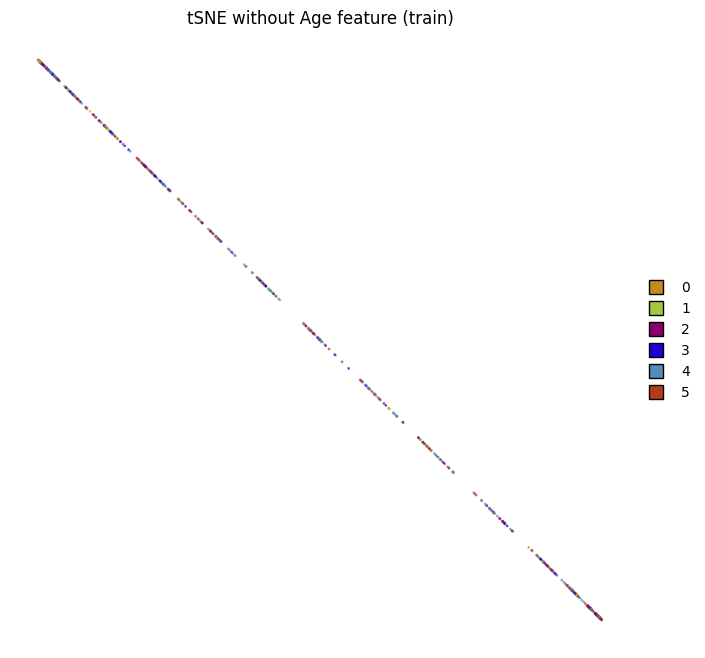

In [74]:
idx = -1
for col in data.columns:
    if col == 'Depression_Score':
        continue

    idx+=1
    X_train_temp = np.delete(X_train, idx, axis=1)
    X_test_temp = np.delete(X_test, idx, axis=1)

    tsne = TSNE(
        n_components=6,
        perplexity=100,
        exaggeration=4,
        metric="euclidean",
        n_jobs=8,
        random_state=42,
        verbose=False,
    )

    embedding_train = tsne.fit(X_train_temp)
    plot(embedding_train, y_train, colors=MACOSKO_COLORS, title=f"tSNE without {col} feature (train)")

    embedding_test = tsne.fit(X_test_temp)
    plot(embedding_test, y_test, colors=MACOSKO_COLORS, title=f"tSNE without {col} feature (test)")
    

KeyboardInterrupt: 

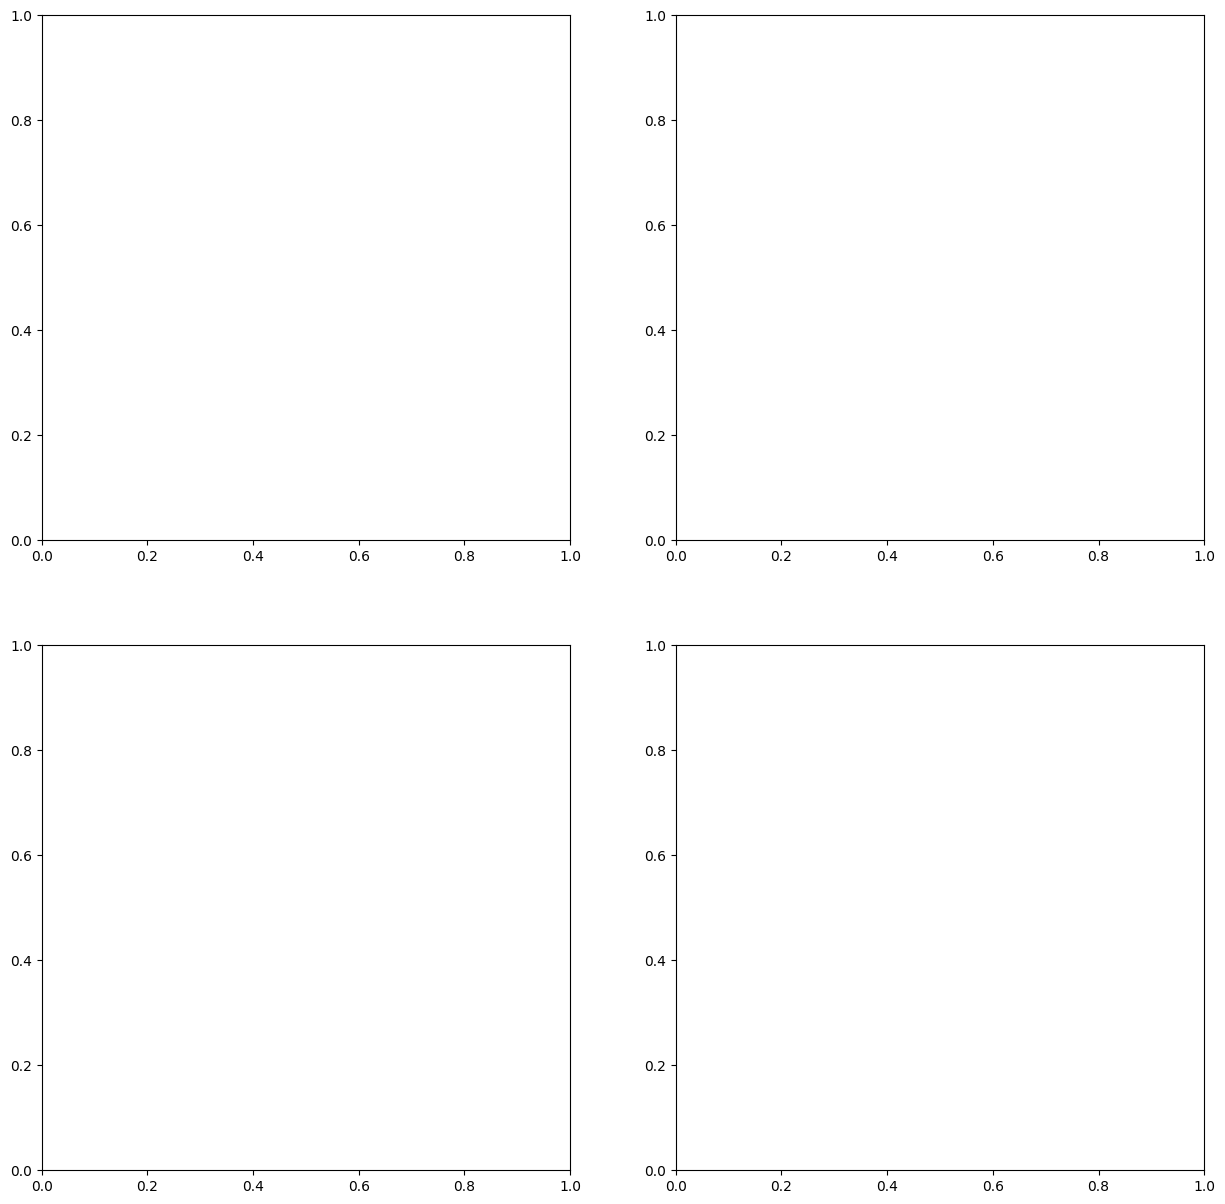

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from openTSNE import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

def preprocess_data(X):
    """Standardize the features"""
    return X

def try_different_perplexities(X, y, perplexities=[5, 30, 50, 100]):
    """Run t-SNE with different perplexity values"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.ravel()
    
    for idx, perp in enumerate(perplexities):
        tsne = TSNE(
            perplexity=perp,
            n_iter=2000,
            initialization='pca',
            learning_rate='auto',
            early_exaggeration=12,
            n_jobs=-1
        )
        
        embedding = tsne.fit(X)
        
        axes[idx].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='tab10')
        axes[idx].set_title(f'Perplexity: {perp}')
        
    plt.tight_layout()
    return fig

def pca_then_tsne(X, y, n_components_pca=10):
    """First reduce with PCA, then apply t-SNE"""
    # PCA first
    pca = PCA(n_components=n_components_pca)
    X_pca = pca.fit_transform(X)
    
    # Then t-SNE
    tsne = TSNE(
        perplexity=30,
        n_iter=2000,
        initialization='pca',
        learning_rate='auto',
        early_exaggeration=12,
        n_jobs=-1
    )
    
    embedding = tsne.fit(X_pca)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='tab10')
    plt.title(f'PCA ({n_components_pca} components) + t-SNE')
    return plt.gcf()

def feature_importance_analysis(X, y):
    """Analyze feature importance using multiple methods"""
    # Random Forest importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_importance = pd.Series(rf.feature_importances_, 
                            index=[f'feature_{i}' for i in range(X.shape[1])])
    
    # Mutual Information
    mi_importance = pd.Series(mutual_info_classif(X, y),
                            index=[f'feature_{i}' for i in range(X.shape[1])])
    
    # Plot importance scores
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    rf_importance.sort_values().plot(kind='barh', ax=ax1)
    ax1.set_title('Random Forest Feature Importance')
    
    mi_importance.sort_values().plot(kind='barh', ax=ax2)
    ax2.set_title('Mutual Information Feature Importance')
    
    plt.tight_layout()
    return fig, rf_importance, mi_importance

def try_umap(X, y):
    """Try UMAP as an alternative to t-SNE"""
    reducer = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=2,
        random_state=42
    )
    
    embedding = reducer.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='tab10')
    plt.title('UMAP Projection')
    return plt.gcf()

def ensemble_tsne(X, y, n_runs=5):
    """Run t-SNE multiple times with different seeds"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i in range(n_runs):
        tsne = TSNE(
            perplexity=30,
            n_iter=2000,
            initialization='pca',
            learning_rate='auto',
            random_state=i*42,
            n_jobs=-1
        )
        
        embedding = tsne.fit(X)
        
        axes[i].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='tab10')
        axes[i].set_title(f'Run {i+1}')
    
    plt.tight_layout()
    return fig

def run_all_analyses(X, y):
    """Run all analyses and return the results"""
    # Preprocess the data
    X_scaled = preprocess_data(X)
    
    results = {}
    
    # 1. Try different perplexities
    results['perplexity_comparison'] = try_different_perplexities(X_scaled, y)
    
    # 2. PCA + t-SNE
    results['pca_tsne'] = pca_then_tsne(X_scaled, y)
    
    # 3. Feature importance analysis
    results['feature_importance_fig'], results['rf_importance'], results['mi_importance'] = feature_importance_analysis(X_scaled, y)
    
    # 4. UMAP
    results['umap'] = try_umap(X_scaled, y)
    
    # 5. Ensemble t-SNE
    results['ensemble'] = ensemble_tsne(X_scaled, y)
    
    return results

# Example usage:
# Assuming X is your feature matrix and y is your target variable
results = run_all_analyses(X, y)

# To use top features based on importance:
def get_top_features_tsne(X, y, n_features=6):
    X_scaled = preprocess_data(X)
    _, rf_importance, _ = feature_importance_analysis(X_scaled, y)
    top_features = rf_importance.nlargest(n_features).index
    
    X_selected = X_scaled[:, [int(f.split('_')[1]) for f in top_features]]
    
    tsne = TSNE(
        perplexity=30,
        n_iter=2000,
        initialization='pca',
        learning_rate='auto',
        n_jobs=-1
    )
    
    embedding = tsne.fit(X_selected)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='tab10')
    plt.title('t-SNE with Top 6 Features')
    return plt.gcf()